In [1]:
import os
import glob

In [2]:

extension = 'csv'
result = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
import pandas as pd
import numpy as np
allof=[]
for i,res in enumerate(result):
    temp = pd.read_csv(result[i]).groupby("NumThreads").mean().Time.values
    allof.append((temp,res))

In [20]:
naive_results_O3 = []
naive_results_O0 = []
simd_results_O3 = []
simd_results_O0 = []
bitwise_result_O3=[]
bitwise_result_O0=[]
trans_result_O3 = []
trans_result_O0 = []
numa_result_O0 = []
numa_result_O3 = []
for elem in allof:
    if elem[1].find("input4") == -1:
        continue
    if elem[1].find("O3_naive") != -1:
        naive_results_O3.append(elem[0])
    if elem[1].find("O0_naive") != -1:
        naive_results_O0.append(elem[0])
    if elem[1].find("O3_simd") != -1:
        simd_results_O3.append(elem[0])
    if elem[1].find("O0_simd") != -1:
        simd_results_O0.append(elem[0])

    if elem[1].find("O3_bitwise_result") != -1:
        bitwise_result_O3.append(elem[0])

    if elem[1].find("O0_bitwise_result") != -1:
        bitwise_result_O0.append(elem[0])

    if elem[1].find("O3_trans") != -1:
        trans_result_O3.append(elem[0])

    if elem[1].find("O0_trans") != -1:
        trans_result_O0.append(elem[0])

    if elem[1].find("O3_numa") != -1:
        numa_result_O3.append(elem[0])
    if elem[1].find("O0_numa") != -1:
        numa_result_O0.append(elem[0])


In [21]:
import seaborn as sns

In [29]:
tmp = pd.Series(numa_result_O3)
rn = pd.Series([1,2,4,8,16])
pd.concat([rn,tmp],axis=1)

,0,1
0,1,"[0.3996456399999999, 0.26591409999999993, 0.14..."
1,2,NaN
2,4,NaN
3,8,NaN
4,16,NaN


In [9]:
import matplotlib.pyplot as plt
sns.set()

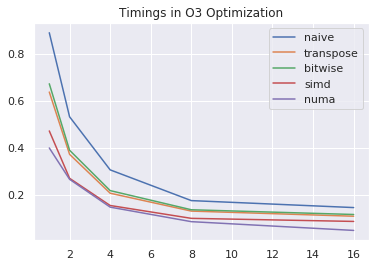

In [34]:
plt.title("Timings in O3 Optimization")
plt.plot([1,2,4,8,16],naive_results_O3[0])
plt.plot([1,2,4,8,16],trans_result_O3[0])
plt.plot([1,2,4,8,16],bitwise_result_O3[0])
plt.plot([1,2,4,8,16],simd_results_O3[0])
plt.plot([1,2,4,8,16],numa_result_O3[0])
plt.legend(["naive","transpose","bitwise","simd","numa"])

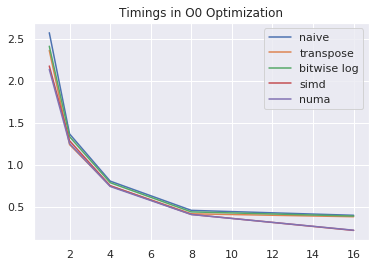

In [33]:
plt.title("Timings in O0 Optimization")
plt.plot([1,2,4,8,16],naive_results_O0[0])
plt.plot([1,2,4,8,16],trans_result_O0[0])
plt.plot([1,2,4,8,16],bitwise_result_O0[0])
plt.plot([1,2,4,8,16],simd_results_O0[0])
plt.plot([1,2,4,8,16],numa_result_O0[0])
plt.legend(["naive","transpose","bitwise log","simd","numa"])

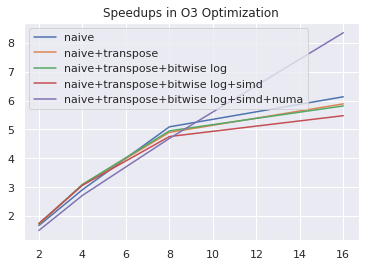

In [30]:
plt.title("Speedups in O3 Optimization")
plt.plot([2,4,8,16],(naive_results_O3[0][0]/naive_results_O3[0])[1:])
plt.plot([2,4,8,16],(trans_result_O3[0][0]/trans_result_O3[0])[1:])
plt.plot([2,4,8,16],(bitwise_result_O3[0][0]/bitwise_result_O3[0])[1:])

plt.plot([2,4,8,16],(simd_results_O3[0][0]/simd_results_O3[0])[1:])
plt.plot([2,4,8,16],(numa_result_O3[0][0]/numa_result_O3[0])[1:])
plt.legend(["naive","naive+transpose","naive+transpose+bitwise log","naive+transpose+bitwise log+simd","naive+transpose+bitwise log+simd+numa"])


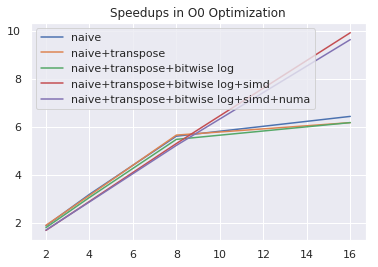

In [31]:
plt.title("Speedups in O0 Optimization")
plt.plot([2,4,8,16],(naive_results_O0[0][0]/naive_results_O0[0])[1:])
plt.plot([2,4,8,16],(trans_result_O0[0][0]/trans_result_O0[0])[1:])
plt.plot([2,4,8,16],(bitwise_result_O0[0][0]/bitwise_result_O0[0])[1:])

plt.plot([2,4,8,16],(simd_results_O0[0][0]/simd_results_O0[0])[1:])
plt.plot([2,4,8,16],(numa_result_O0[0][0]/numa_result_O0[0])[1:])
plt.legend(["naive","naive+transpose","naive+transpose+bitwise log","naive+transpose+bitwise log+simd","naive+transpose+bitwise log+simd+numa"])


In [48]:
naive_results_O3

[array([0.89134176, 0.53275012, 0.30620326, 0.17505914, 0.1453359 ])]

In [89]:
d = {"naive":pd.Series(naive_results_O3[0],index=[1,2,4,8,16]),
    "bitwise":pd.Series(bitwise_result_O3[0],index=[1,2,4,8,16]),
     "trans":pd.Series(trans_result_O3[0],index=[1,2,4,8,16]),
    "simd":pd.Series(simd_results_O3[0],index=[1,2,4,8,16])
    ,"numa":pd.Series(numa_result_O3[0],index=[1,2,4,8,16])}

d = pd.DataFrame(d)
d.index.name = "Num threads"
d.transpose()

Num threads,1,2,4,8,16
naive,0.891342,0.532750,0.306203,0.175059,0.145336
bitwise,0.673558,0.389929,0.217729,0.136017,0.115805
trans,0.638270,0.372538,0.206570,0.130297,0.108410
simd,0.472302,0.270185,0.154181,0.099316,0.086214
numa,0.399646,0.265914,0.147188,0.085206,0.047850


Num threads,1,2,4,8,16
naive,0.891342,0.532750,0.306203,0.175059,0.145336
trans,0.638270,0.372538,0.206570,0.130297,0.108410
bitwise,0.673558,0.389929,0.217729,0.136017,0.115805
simd,0.472302,0.270185,0.154181,0.099316,0.086214
numa,0.399646,0.265914,0.147188,0.085206,0.047850


In [90]:
d = {"naive":pd.Series(naive_results_O0[0],index=[1,2,4,8,16]),
    "bitwise":pd.Series(bitwise_result_O0[0],index=[1,2,4,8,16]),
    "trans":pd.Series(trans_result_O0[0],index=[1,2,4,8,16]),

    "simd":pd.Series(simd_results_O0[0],index=[1,2,4,8,16])
    ,"numa":pd.Series(numa_result_O0[0],index=[1,2,4,8,16])}

d = pd.DataFrame(d)
d.index.name = "Num threads"
d.transpose()

Num threads,1,2,4,8,16
naive,2.572285,1.367526,0.806103,0.458080,0.399450
bitwise,2.411824,1.335160,0.787473,0.439884,0.390223
trans,2.361621,1.240751,0.750488,0.417197,0.382152
simd,2.175905,1.286362,0.750958,0.409846,0.219284
numa,2.135494,1.252519,0.742596,0.408255,0.221592


In [119]:
sp = {"naive":pd.Series((naive_results_O0[0][0]/naive_results_O0[0])[1:],[2,4,8,16]),
     "bitwise":pd.Series((bitwise_result_O0[0][0]/bitwise_result_O0[0])[1:],[2,4,8,16]),
     "trans":pd.Series((trans_result_O0[0][0]/trans_result_O0[0])[1:],[2,4,8,16]),
     "simd":pd.Series((simd_results_O0[0][0]/simd_results_O0[0])[1:],[2,4,8,16]),
     "numa":pd.Series((numa_result_O0[0][0]/numa_result_O0[0])[1:],[2,4,8,16])}



O0Sp = pd.DataFrame(sp)
O0Sp  = O0Sp.transpose()
O0Sp.index.name = "Num threads"
O0Sp

,2,4,8,16
Num threads,,,,
naive,1.880977,3.191011,5.615365,6.439563
bitwise,1.806393,3.062740,5.482863,6.180629
trans,1.903380,3.146780,5.660680,6.179794
simd,1.691519,2.897505,5.309079,9.922753
numa,1.704959,2.875712,5.230782,9.637068


In [ ]:
sp = {"naive":pd.Series((naive_results_O0[0][0]/*2naive_results_O0[0])[1:],[2,4,8,16]),
     "bitwise":pd.Series((bitwise_result_O0[0][0]/bitwise_result_O0[0])[1:],[2,4,8,16]),
     "trans":pd.Series((trans_result_O0[0][0]/trans_result_O0[0])[1:],[2,4,8,16]),
     "simd":pd.Series((simd_results_O0[0][0]/simd_results_O0[0])[1:],[2,4,8,16]),
     "numa":pd.Series((numa_result_O0[0][0]/numa_result_O0[0])[1:],[2,4,8,16])}



O0Sp = pd.DataFrame(sp)
O0Sp  = O0Sp.transpose()
O0Sp.index.name = "Num threads"
O0Sp

In [118]:
sp = {"naive":pd.Series((naive_results_O3[0][0]/naive_results_O3[0])[1:],[2,4,8,16]),
     "bitwise":pd.Series((bitwise_result_O3[0][0]/bitwise_result_O3[0])[1:],[2,4,8,16]),
     "trans":pd.Series((trans_result_O3[0][0]/trans_result_O3[0])[1:],[2,4,8,16]),
     "simd":pd.Series((simd_results_O3[0][0]/simd_results_O3[0])[1:],[2,4,8,16]),
     "numa":pd.Series((numa_result_O3[0][0]/numa_result_O3[0])[1:],[2,4,8,16])}



O3Sp = pd.DataFrame(sp)
O3Sp  = O3Sp.transpose()
O3Sp.index.name = "Num threads"
O3Sp

,2,4,8,16
Num threads,,,,
naive,1.673095,2.910948,5.091661,6.132977
bitwise,1.727387,3.093558,4.952027,5.816307
trans,1.713301,3.089848,4.898573,5.887577
simd,1.748072,3.063293,4.755546,5.478280
numa,1.502913,2.715206,4.690330,8.351998


,2,4,8,16
Num threads,,,,
naive,1.880977,3.191011,5.615365,6.439563
bitwise,1.806393,3.062740,5.482863,6.180629
trans,1.903380,3.146780,5.660680,6.179794
simd,1.691519,2.897505,5.309079,9.922753
numa,1.704959,2.875712,5.230782,9.637068
